## CS-5312 Big Data Analytics
#### Programming Assignment 1: EDA and Basic Peprocessing

# Guidelines and Instructions:

• Deadline to submit the Assignment is February 20, 2022.

• Rename this notebook to yourID_Fullname_Assignment_1.

• You are required to do the Assignment tasks in Python (Jupyter Notebook).

• Along with this notebook(.ipynb file) also submit the .html version of this.

• In case of any query, please feel free to write us an email.

# Basic Preprocessing

# Problem 1

Read the students_info.csv file (using pandas or any other library)

Consider the CGPA attribute of students_info.csv

Answer the following questions:

### 1.1. Give the five-number summary for the CGPA.

In [1]:
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('students_info.csv')
cgpa_array = data[['CGPA']].to_numpy()
quartiles = percentile(cgpa_array, [25, 50, 75])
print('min: ',np.min(cgpa_array))
print('Q1: ',quartiles[0])
print('median: ',np.median(cgpa_array))
print('Q3: ',quartiles[2])
print('max: ',np.max(cgpa_array))

min:  2.19
Q1:  2.9850000000000003
median:  3.18
Q3:  3.83
max:  4.0


### 1.2. Show a box plot of the data.

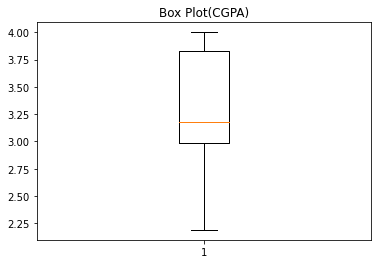

In [2]:
#Hint : plt.boxplot()
plt.boxplot(cgpa_array)
plt.title("Box Plot(CGPA)")
plt.show()

### 1.3. Partition the given data into 4 bins using

(a) Equal frequency partitioning

(b) Equal width partitioning

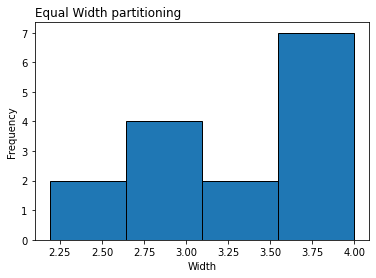

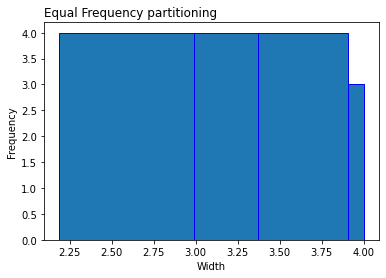

In [3]:
#Hint use plt.hist and look into documentation of arguments
n, bins, patches = plt.hist(cgpa_array, bins=4,edgecolor='black')
plt.title("Equal Width partitioning", loc = 'left')
plt.xlabel("Width")
plt.ylabel("Frequency")
plt.show()


#create histogram with equal-frequency bins 
bins = np.interp(np.linspace(0, len(cgpa_array[:,0]), 4 + 1),np.arange(len(cgpa_array[:,0])),np.sort(cgpa_array[:,0]))
n, bins, patches = plt.hist(cgpa_array, bins = bins, edgecolor='blue')
plt.title("Equal Frequency partitioning", loc = 'left')
plt.xlabel("Width")
plt.ylabel("Frequency")
plt.show()

### 1.4. How would you determine the outliers in this data (if any)?

In [4]:
print('The above box plot shows that there are no outliers in the cgpa data')

The above box plot shows that there are no outliers in the cgpa data


### 1.5. Consider the following small data of student's marks in a subject:

88, 83.3, 58, ?, ?, 84, 54, 75, 50, 71, 25, 72, ?, ?, 73.9, ?, 85, 62.9, 44.6, 88

(a) Handle/fill the missing values (represented as ?) using two approaches of your choice


In [5]:
#hint this is explained in class for example one way could be to to add something which will not effect the 
#statistics of already known data. Whatever appraoch you use try to write a reason for it and explain its effect 
#upon basic analysis.
list_ = [88, 83.3, 58, np.nan, np.nan, 84, 54, 75, 50, 71, 25, 72, np.nan, np.nan, 73.9, np.nan, 85, 62.9, 44.6, 88]
df = pd.DataFrame()
df["data"] = list_
##### Replace Missing Values with Mean
print('It can be seen that the data is skewed. Thus, replacing missing values with mean might favour the students with missing score.')
print(df.fillna(df.mean()))
##### Replace Missing Values with Meadian
print('When the data is skewed, it is a good idea to replace missing values with median')
df.fillna(df.median())

It can be seen that the data is skewed. Thus, replacing missing values with mean might favour the students with missing score.
         data
0   88.000000
1   83.300000
2   58.000000
3   67.646667
4   67.646667
5   84.000000
6   54.000000
7   75.000000
8   50.000000
9   71.000000
10  25.000000
11  72.000000
12  67.646667
13  67.646667
14  73.900000
15  67.646667
16  85.000000
17  62.900000
18  44.600000
19  88.000000
When the data is skewed, it is a good idea to replace missing values with median


data
0   88.0
1   83.3
2   58.0
3   72.0
4   72.0
5   84.0
6   54.0
7   75.0
8   50.0
9   71.0
10  25.0
11  72.0
12  72.0
13  72.0
14  73.9
15  72.0
16  85.0
17  62.9
18  44.6
19  88.0

# Data Understanding and Visualization (EDA)


# Problem 2

Consider the Age attribute form students_info.csv

### 2.1. Calculate the following:
(a) Mean

(b) Median

(c) Mode 

(d) 5% and 10% trimmed mean

(e) What do you think is a better measure of centrality? Which one is more robust?

In [6]:
from scipy import stats
data = pd.read_csv('students_info.csv')
age = data[['Age']].to_numpy()
print('mean: ',np.mean(age))
print('median: ',np.median(age))
print('mode: ',stats.mode(age)[0][0][0])
print('5% trimmed mean: ',stats.trim_mean(age, 0.05)[0])
print('10% trimmed mean: ',stats.trim_mean(age, 0.1)[0])
#Hint: use stats.trimboth

mean:  23.2
median:  23.0
mode:  23
5% trimmed mean:  23.2
10% trimmed mean:  23.23076923076923


### 2.2. Create a list of 500 random numbers with uniform distribution between 1 and 10.
Calculate mean, median, mode of 5% trimmed and 10% trimmed data. Comment about the difference between original dataset mean and mean obtained after trimming.

In [7]:
import random
from statistics import mean,median
list_random = [random.uniform(1, 10) for i in range(100)]
print('mean: ',mean(list_random))
print('median: ',median(list_random))
print('mode: ',stats.mode(list_random)[0][0])
print('5% trimmed mean: ',stats.trim_mean(list_random, 0.05))
print('10% trimmed mean: ',stats.trim_mean(list_random, 0.1))
#Hint: this is pretty simple and similar to previous parts 

mean:  5.372649769295603
median:  5.221388010528138
mode:  1.018944992751993
5% trimmed mean:  5.370541670809894
10% trimmed mean:  5.364551008760147


# Problem 3

#### Download the Air Quality Data Set from UCI Machine Learning Repository. [https://archive.ics.uci.edu/ml/datasets/Air+Quality] Read the dataset’s description and report the results of following tasks:
    
#### 3.1. Univariate Analysis

(a) Identify numerical, ordinal and categorical attributes and find the count of distinct values for each
attributes.

(b) For numerical/ordinal values draw histograms using 5 bins and 10 bins.

(c) Compute five number summary (min, max, lower quartiles, upper quartiles and mean), median, mode and standard deviation.

(d) Identity outliers for each attribute

(e) Analyze charts from (b), interpret and report the distribution of each attribute. (symmetric, positively skewed, negatively skewed)

(f) Are there any missing values? What are missing values being represented with?

(g) Fill up missing values using different techniques. (mean/median for numeric and mode for categorical)

(h) After filling the missing values, perform (b), (c), (d), (e) and (f) again on modified data and report
the attributes which showed change in calculated metrics. Explain the differences observed.

In [8]:
import pandas as pd

data = pd.read_excel('AirQualityUCI.xlsx')
print('Date and Time are ordinal, but the rest are numerical attributes')
data.head()
print('Count distinct CO(GT): ',len(data['CO(GT)'].unique().tolist()))
print('Count distinct PT08.S1(CO): ',len(data['PT08.S1(CO)'].unique().tolist()))
print('Count distinct NMHC(GT): ',len(data['NMHC(GT)'].unique().tolist()))
print('Count distinct C6H6(GT): ',len(data['C6H6(GT)'].unique().tolist()))
print('Count distinct PT08.S2(NMHC)): ',len(data['PT08.S2(NMHC)'].unique().tolist()))
print('Count distinct NOx(GT)): ',len(data['NOx(GT)'].unique().tolist()))
print('Count distinct PT08.S3(NOx)): ',len(data['PT08.S3(NOx)'].unique().tolist()))
print('Count distinct NO2(GT)): ',len(data['NO2(GT)'].unique().tolist()))
print('Count distinct PT08.S4(NO2)): ',len(data['PT08.S4(NO2)'].unique().tolist()))
print('Count distinct PT08.S5(O3)): ',len(data['PT08.S5(O3)'].unique().tolist()))
print('Count distinct T: ',len(data['T'].unique().tolist()))
print('Count distinct AH: ',len(data['AH'].unique().tolist()))
print('Count distinct RH: ',len(data['RH'].unique().tolist()))
print('Count distinct Date: ',len(data['Date'].unique().tolist()))

Date and Time are ordinal, but the rest are numerical attributes
Count distinct CO(GT):  97
Count distinct PT08.S1(CO):  3246
Count distinct NMHC(GT):  430
Count distinct C6H6(GT):  3773
Count distinct PT08.S2(NMHC)):  3773
Count distinct NOx(GT)):  2467
Count distinct PT08.S3(NOx)):  3519
Count distinct NO2(GT)):  1420
Count distinct PT08.S4(NO2)):  4408
Count distinct PT08.S5(O3)):  4679
Count distinct T:  3368
Count distinct AH:  8988
Count distinct RH:  4903
Count distinct Date:  391


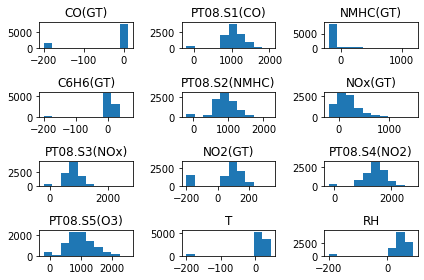

In [9]:
col_list = ['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)',\
            'PT08.S4(NO2)','PT08.S5(O3)','T','RH'] 
f,a = plt.subplots(4,3)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(data[col_list[idx]], bins=10)
    ax.set_title(col_list[idx])
    #ax.set_xlabel("Values range")
    #ax.set_ylabel('Frequency')
plt.tight_layout()

In [10]:
for i,x in enumerate(col_list):
  array = data[x].to_numpy()
  quartiles = percentile(array, [25, 50, 75])
  print('\033[92m' +'\033[1m'+ '\033[4m'+ x +' statistics:' + '\033[0m')
  print('min: ',np.min(array))
  print('Q1: ',quartiles[0])
  print('median: ',np.median(array))
  print('Q3: ',quartiles[2])
  print('max: ',np.max(array))
  print('std: ',np.std(array))
  print('std: ',stats.mode(array)[0][0])

CO(GT) statistics:
min:  -200.0
Q1:  0.6
median:  1.5
Q3:  2.6
max:  11.9
std:  77.65302055281113
std:  -200.0
PT08.S1(CO) statistics:
min:  -200.0
Q1:  921.0
median:  1052.5
Q3:  1221.25
max:  2039.75
std:  329.79939001303393
std:  -200.0
NMHC(GT) statistics:
min:  -200
Q1:  -200.0
median:  -200.0
Q3:  -200.0
max:  1189
std:  139.78162293696653
std:  -200
C6H6(GT) statistics:
min:  -200.0
Q1:  4.00495801135597
median:  7.886652812465704
Q3:  13.636091225089844
max:  63.74147644829163
std:  41.37794273159339
std:  -200.0
PT08.S2(NMHC) statistics:
min:  -200.0
Q1:  711.0
median:  894.5
Q3:  1104.75
max:  2214.0
std:  342.2976093835296
std:  -200.0
NOx(GT) statistics:
min:  -200.0
Q1:  50.0
median:  141.0
Q3:  284.2
max:  1479.0
std:  257.4108052750004
std:  -200.0
PT08.S3(NOx) statistics:
min:  -200.0
Q1:  637.0
median:  794.25
Q3:  960.25
max:  2682.75
std:  321.959825751326
std:  -200.0
NO2(GT) statistics:
min:  -200.0
Q1:  53.0
median:  96.0
Q3:  133.0
max:  339.7
std:  126.924645307

There are lots of outliers in almost every column ( Evident from the box plot)


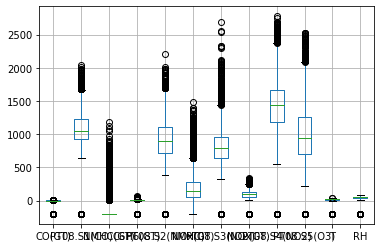

In [11]:
boxplot = data.boxplot(column=col_list)  
print('There are lots of outliers in almost every column ( Evident from the box plot)')

In [12]:
 
print('NMHC(GT), NOx(GT) and PT08.S3(NOx) are positively skewed.')
print('CO(GT), C6H6(GT),RH, T, PT08.S1(CO) and PT08.S4(NO2) are negatively skewed. The rest are symmetric.')

NMHC(GT), NOx(GT) and PT08.S3(NOx) are positively skewed.
CO(GT), C6H6(GT),RH, T, PT08.S1(CO) and PT08.S4(NO2) are negatively skewed. The rest are symmetric.


In [13]:
data.isin([-200]).any()



Date             False
Time             False
CO(GT)            True
PT08.S1(CO)       True
NMHC(GT)          True
C6H6(GT)          True
PT08.S2(NMHC)     True
NOx(GT)           True
PT08.S3(NOx)      True
NO2(GT)           True
PT08.S4(NO2)      True
PT08.S5(O3)       True
T                 True
RH                True
AH                True
dtype: bool

In [14]:
print('There are  missing values in every column except Date and time. The missing values are represented by -200 ')

There are  missing values in every column except Date and time. The missing values are represented by -200 


In [15]:
data = pd.read_excel('AirQualityUCI.xlsx')
data[data == -200] = np.nan
column_means = data.mean()
data = data.fillna(column_means)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


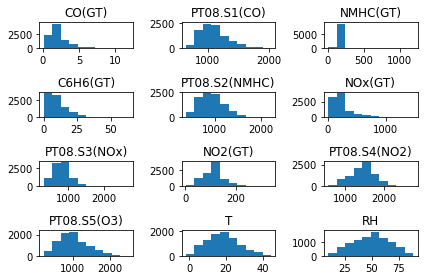

In [16]:
col_list = ['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)',\
            'PT08.S4(NO2)','PT08.S5(O3)','T','RH'] 
f,a = plt.subplots(4,3)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(data[col_list[idx]], bins=10)
    ax.set_title(col_list[idx])
    #ax.set_xlabel("Values range")
    #ax.set_ylabel('Frequency')
plt.tight_layout()

In [17]:
for i,x in enumerate(col_list):
  array = data[x].to_numpy()
  quartiles = percentile(array, [25, 50, 75])
  print('\033[92m' +'\033[1m'+ '\033[4m'+ x +' statistics:' + '\033[0m')
  print('min: ',np.min(array))
  print('Q1: ',quartiles[0])
  print('median: ',np.median(array))
  print('Q3: ',quartiles[2])
  print('max: ',np.max(array))
  print('std: ',np.std(array))
  print('std: ',stats.mode(array)[0][0])

CO(GT) statistics:
min:  0.1
Q1:  1.2
median:  2.1527495439145157
Q3:  2.6
max:  11.9
std:  1.3159979857003437
std:  2.1527495439145157
PT08.S1(CO) statistics:
min:  647.25
Q1:  941.25
median:  1074.5
Q3:  1221.25
max:  2039.75
std:  212.78474441288733
std:  1099.707856004152
NMHC(GT) statistics:
min:  7.0
Q1:  218.81181619256017
median:  218.81181619256017
Q3:  218.81181619256017
max:  1189.0
std:  63.86681566716158
std:  218.81181619256017
C6H6(GT) statistics:
min:  0.14904773883376646
Q1:  4.591495033754221
median:  8.593367010206421
Q3:  13.636091225089844
max:  63.74147644829163
std:  7.302083744885219
std:  10.082993455078704
PT08.S2(NMHC) statistics:
min:  383.25
Q1:  742.5
median:  923.25
Q3:  1104.75
max:  2214.0
std:  261.5438787808859
std:  939.0292051310571
NOx(GT) statistics:
min:  2.0
Q1:  112.0
median:  229.0
Q3:  284.2
max:  1479.0
std:  193.40908122511462
std:  246.88125161959098
PT08.S3(NOx) statistics:
min:  322.0
Q1:  665.5
median:  817.5
Q3:  960.25
max:  2682.75
s

There are lots of outliers in almost every column ( Evident from the box plot)


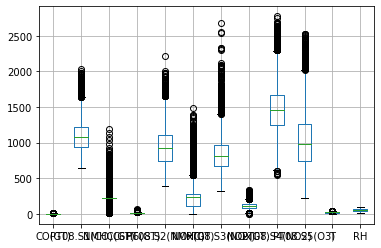

In [18]:
boxplot = data.boxplot(column=col_list)  
print('There are lots of outliers in almost every column ( Evident from the box plot)')

In [19]:
print('The data is now consistent after replacing missing values')

The data is now consistent after replacing missing values


# 3.2. Bivariate Analysis

(a) For every pair of attributes (x, y) such that x is a categorical attribute and y is a numeric attribute,
draw the boxplots and the overlapping histograms of y against each category of x.

(b) From (a), for every plot, report the mean value for each category of x attribute and which category
of x has more exibility (variance).

(c) Draw scatter plot and line graph for every pair of numeric variables and analyze the relationship
between pair of attributes.

(d) Perform chi-square test for every pair of categorical attributes and see if there is any relationship
between the pair of attributes.

(e) For each pair of categorical/ordinal attributes, give the contingency table. (Note that if nominal
attributes have too many values, for the sake of simplicity you can show results up to 6 levels
only.)

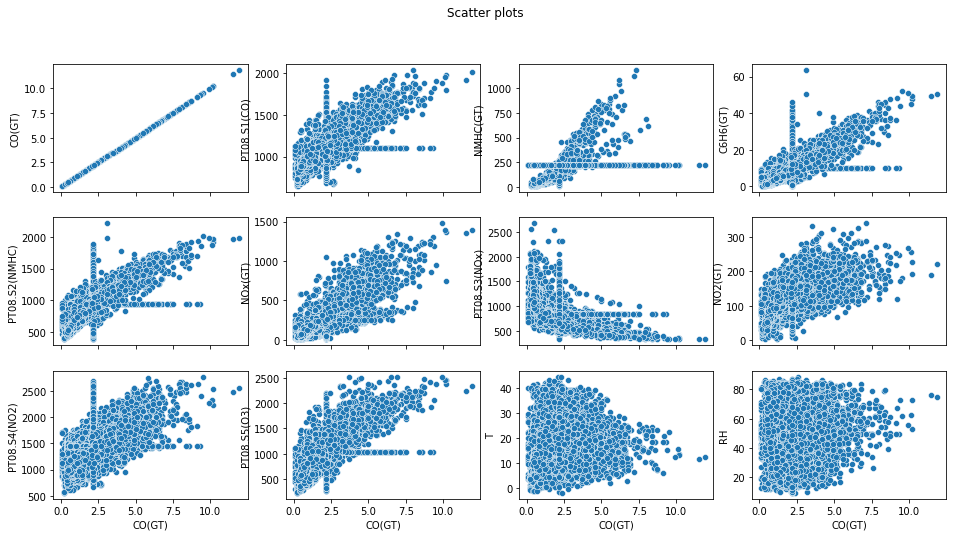

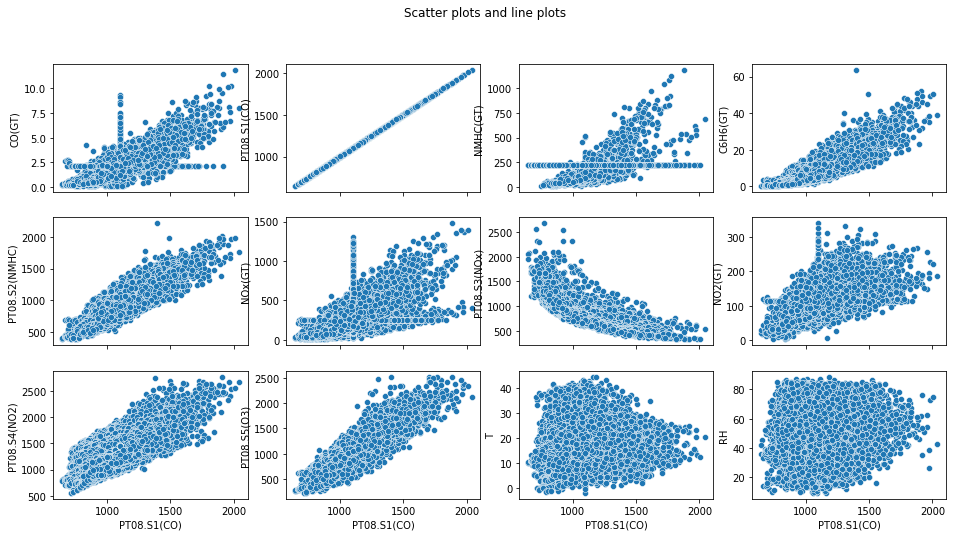

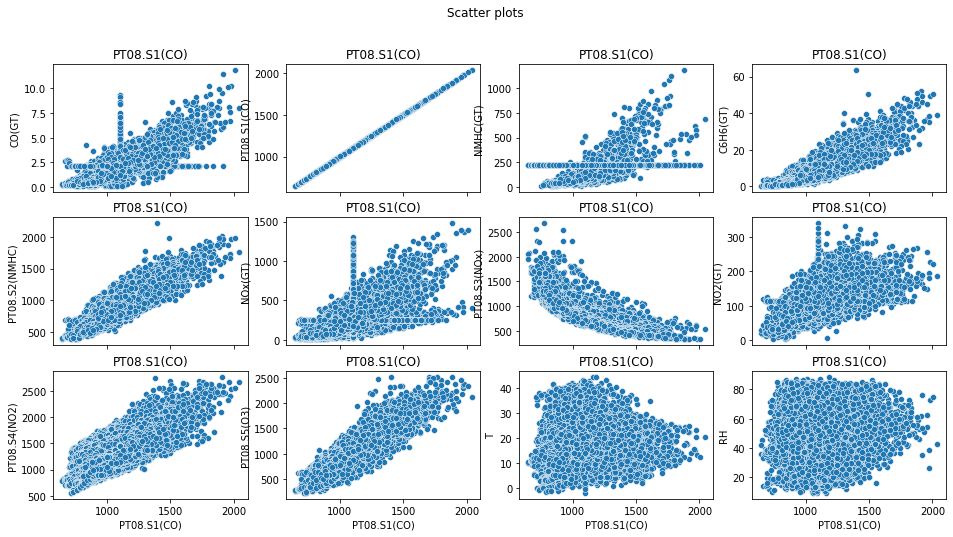

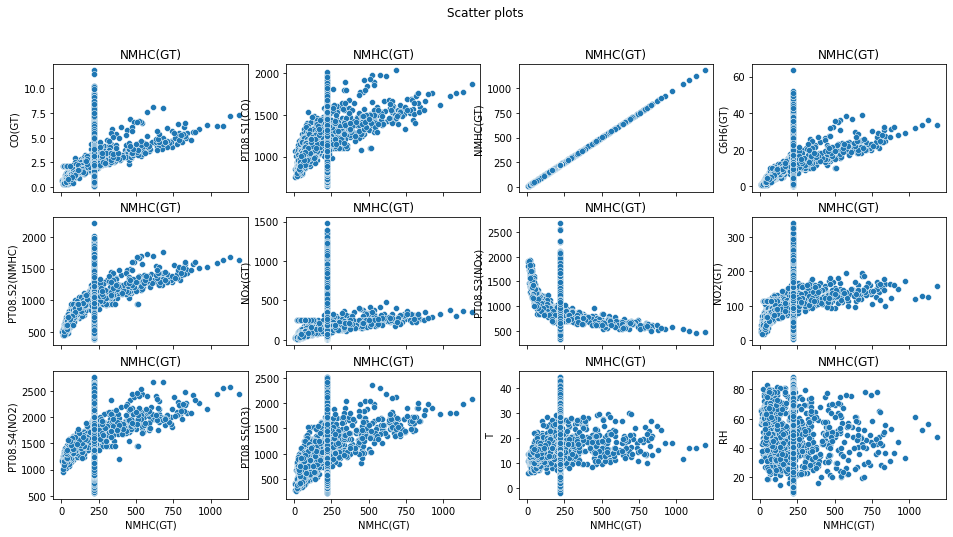

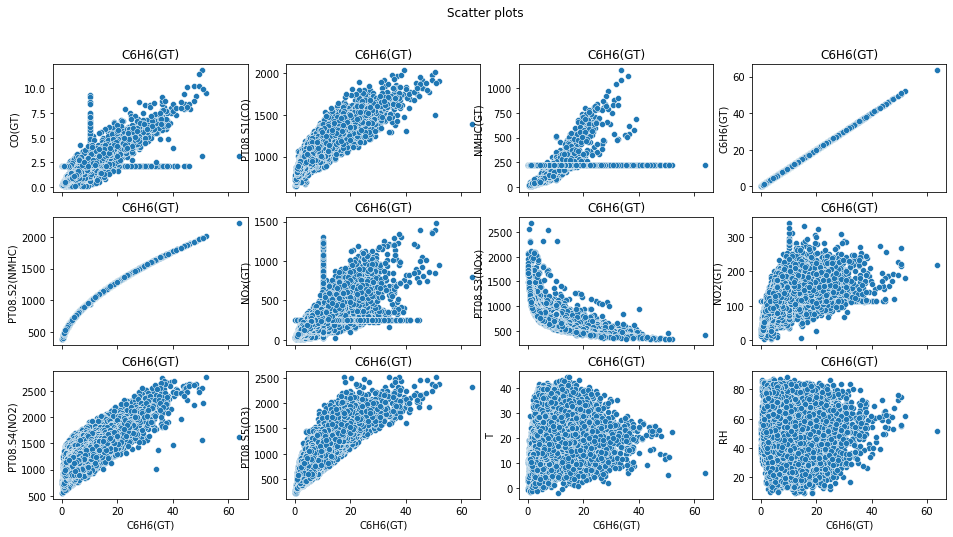

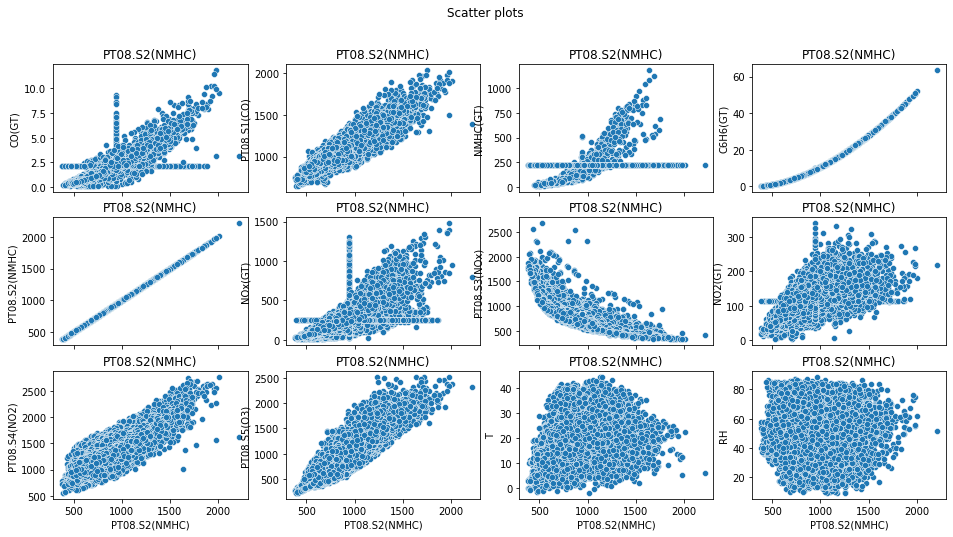

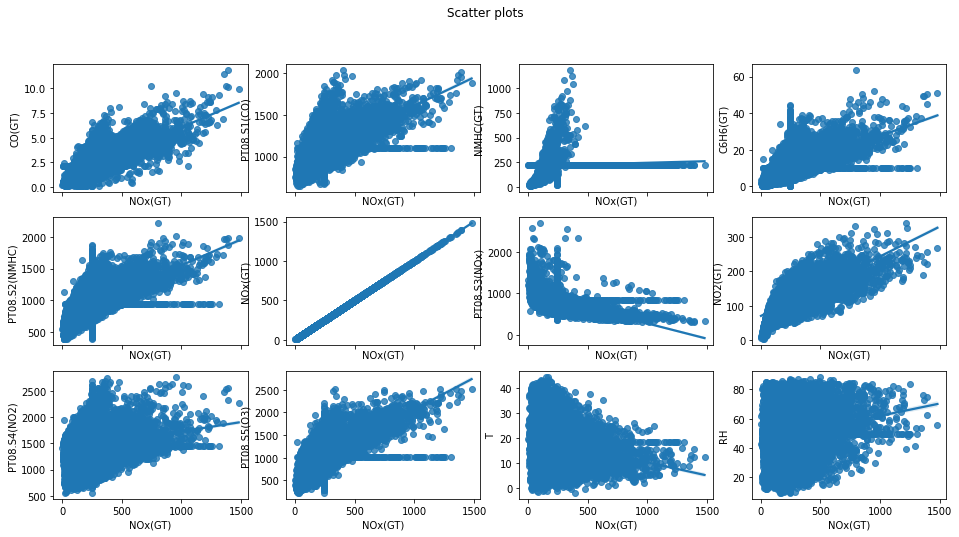

In [20]:
import seaborn as sns
from scipy import stats
from scipy.stats import chisquare
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
axes = axes.flatten()
fig.suptitle('Scatter plots')
for idx,ax in enumerate(axes):
  sns.scatterplot(data=data, x="CO(GT)", y=col_list[idx],ax=ax)
#sns.displot(data, x="Date", hue="CO(GT)")
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
axes = axes.flatten()
fig.suptitle('Scatter plots and line plots')
for idx,ax in enumerate(axes):
  sns.scatterplot(data=data, x="PT08.S1(CO)", y=col_list[idx],ax=ax)


  ##############
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
axes = axes.flatten()
fig.suptitle('Scatter plots')
for idx,ax in enumerate(axes):
  sns.scatterplot(data=data, x="PT08.S1(CO)", y=col_list[idx],ax=ax)
  axes[idx].set_title('PT08.S1(CO)')
################
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
axes = axes.flatten()
fig.suptitle('Scatter plots')
for idx,ax in enumerate(axes):
  sns.scatterplot(data=data, x="NMHC(GT)", y=col_list[idx],ax=ax)
  axes[idx].set_title('NMHC(GT)')

#######################3
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
axes = axes.flatten()
fig.suptitle('Scatter plots')
for idx,ax in enumerate(axes):
  sns.scatterplot(data=data, x="C6H6(GT)", y=col_list[idx],ax=ax)
  axes[idx].set_title('C6H6(GT)')

#############################
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
axes = axes.flatten()
fig.suptitle('Scatter plots')
for idx,ax in enumerate(axes):
  sns.scatterplot(data=data, x="PT08.S2(NMHC)", y=col_list[idx],ax=ax)
  axes[idx].set_title('PT08.S2(NMHC)')

#####################
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
axes = axes.flatten()
fig.suptitle('Scatter plots')
for idx,ax in enumerate(axes):
  sns.regplot(data=data, x="NOx(GT)", y=col_list[idx],ax=ax)

#Hint sns.regplot, sns.lineplot, pd.crosstab, stats.chi2_contingency, sns.heatmap, stats.zscore, sns.boxplot, 

In [21]:
#create contingency table #simplified
col_list = ['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)',\
            'PT08.S4(NO2)','PT08.S5(O3)','T','RH']
for i,x in enumerate(col_list):
  print(pd.crosstab(index=data['Date'], columns=data[x]).head())


CO(GT)      0.1   0.2   0.3   ...  10.2  11.5  11.9
Date                          ...                  
2004-03-10     0     0     0  ...     0     0     0
2004-03-11     0     0     0  ...     0     0     0
2004-03-12     0     0     0  ...     0     0     0
2004-03-13     0     0     0  ...     0     0     0
2004-03-14     0     0     0  ...     0     0     0

[5 rows x 97 columns]
PT08.S1(CO)  647.25   648.75   654.75   ...  1982.25  2007.75  2039.75
Date                                    ...                           
2004-03-10         0        0        0  ...        0        0        0
2004-03-11         0        0        0  ...        0        0        0
2004-03-12         0        0        0  ...        0        0        0
2004-03-13         0        0        0  ...        0        0        0
2004-03-14         0        0        0  ...        0        0        0

[5 rows x 3246 columns]
NMHC(GT)    7.0     8.0     9.0     10.0    ...  1042.0  1084.0  1129.0  1189.0
Date       

# 3.3. Multivariate Analysis

(a) Compute and give the co-variance matrix of numerical attributes.

(b) For each pair of numeric attributes, plot heatmap which is actually visual representation of cor-
relation matrix. So calculate correlation matrices as well.

(c) From (b), report the attributes with highest and lowest correlation.

In [22]:
data2 = np.array([data[col_list[0]],data[col_list[1]],data[col_list[2]], data[col_list[3]], data[col_list[4]],\
                  data[col_list[5]], data[col_list[6]], data[col_list[7]], data[col_list[8]], data[col_list[9]],\
                  data[col_list[10]],data[col_list[11]]   ])
cov_matrix  = np.cov(data2)
print(cov_matrix)


[[ 1.73203580e+00  2.16592338e+02  2.43746112e+01  7.80754064e+00
   2.73863108e+02  1.94045165e+02 -2.03380983e+02  3.73628290e+01
   2.49318724e+02  3.90191371e+02  2.30868411e-01  9.65138069e-01]
 [ 2.16592338e+02  4.52821868e+04  3.78230654e+03  1.37340294e+03
   4.97015031e+04  2.53527976e+04 -4.13514018e+04  5.26070533e+03
   4.93141668e+04  7.47520423e+04  8.95950374e+01  4.13969304e+02]
 [ 2.43746112e+01  3.78230654e+03  4.07940612e+03  1.31491829e+02
   4.67345487e+03  1.21294690e+03 -4.21240892e+03  4.39058912e+02
   5.04998781e+03  6.00240257e+03  3.69462903e+01 -5.72368845e+01]
 [ 7.80754064e+00  1.37340294e+03  1.31491829e+02  5.33261261e+01
   1.87556656e+03  8.71305599e+02 -1.35248574e+03  1.71930745e+02
   1.89760456e+03  2.46940907e+03  1.25754180e+01 -7.64098191e+00]
 [ 2.73863108e+02  4.97015031e+04  4.67345487e+03  1.87556656e+03
   6.84125119e+04  3.04458938e+04 -5.24579088e+04  6.44808214e+03
   6.89902184e+04  8.99671360e+04  5.46532480e+02 -4.01140281e+02]
 [ 1.

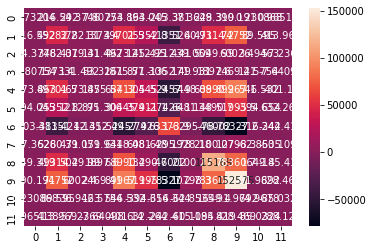

PT08.S2(NMHC) and PT08.S1(CO) have highest correlation; CO(GT) and RH have lowest correlation


In [23]:
sns.heatmap(cov_matrix, annot=True, fmt='g')
plt.show()
print("PT08.S2(NMHC) and PT08.S1(CO) have highest correlation; CO(GT) and RH have lowest correlation")

# 4. Normalization Analysis

(a) Use normalization techniques (i) Min-Max and (ii) Z-Score to normalize/scale the numeric at-
tributes.

(b) For each normalization, redo tasks (Univariate Analysis) and (Bivariate Analysis).

(c) Comment on the differences in analysis results computed with and without normalization. You
can also show the plots while making comparisons.

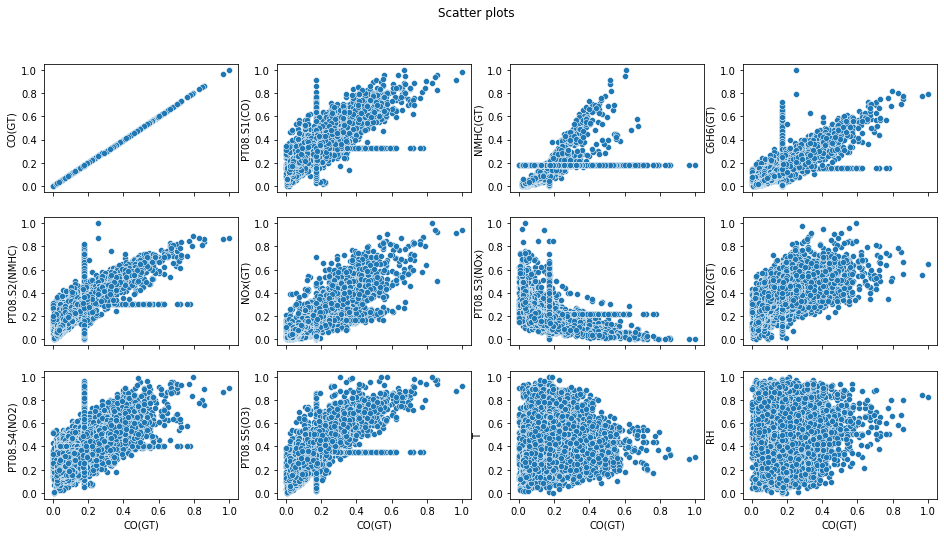

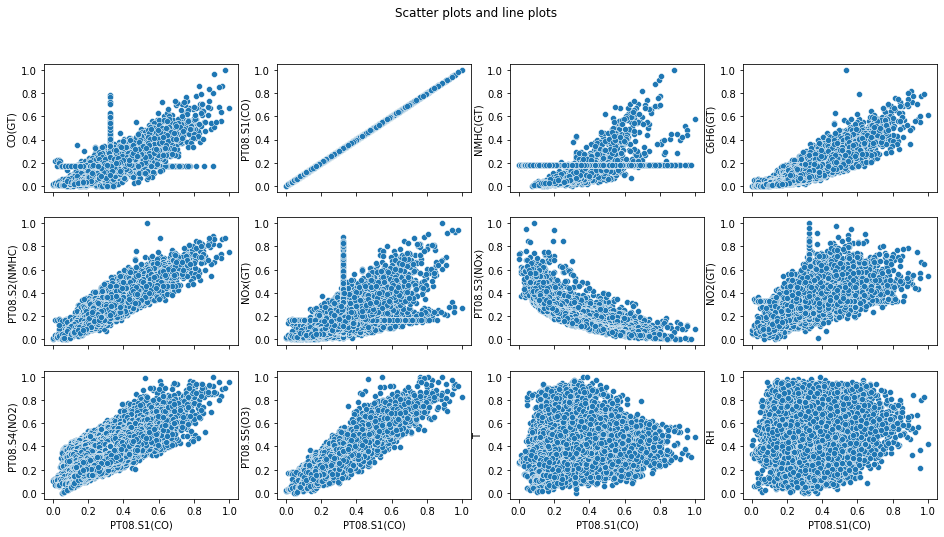

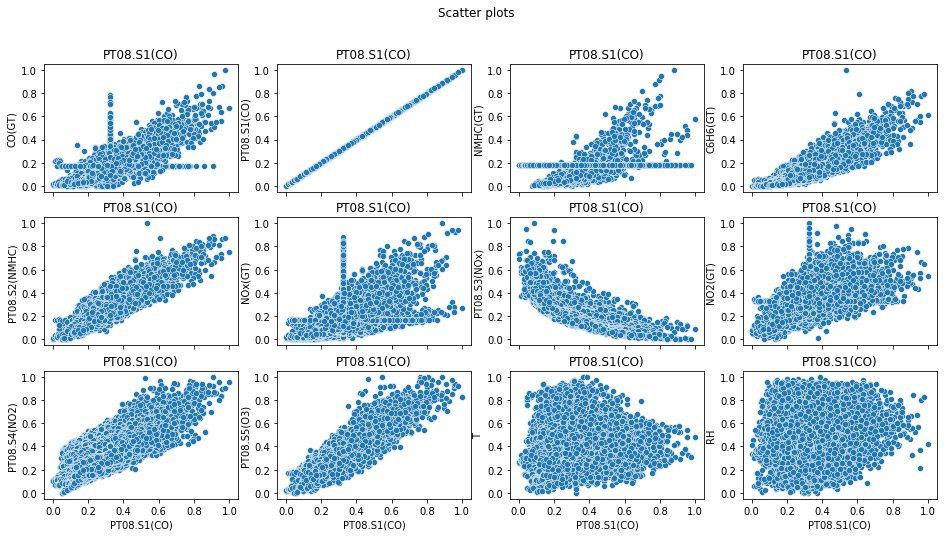

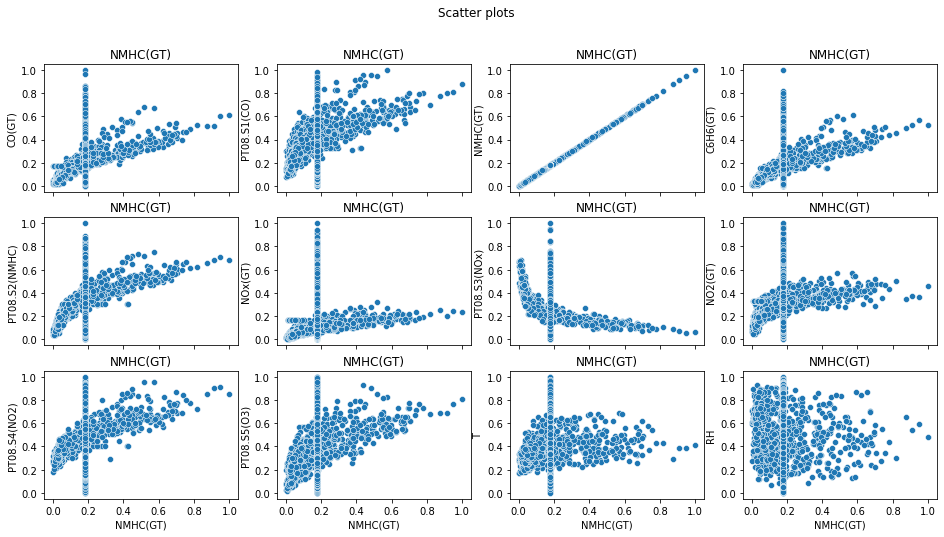

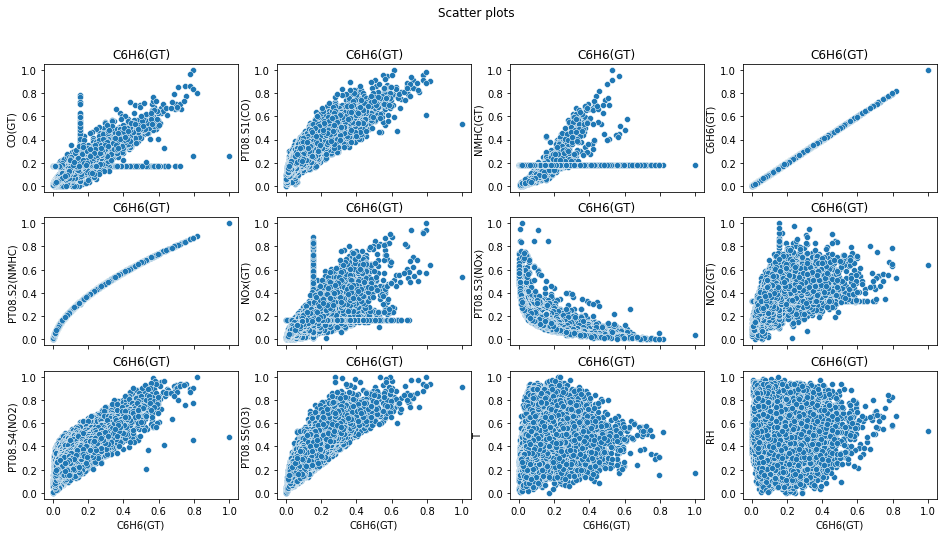

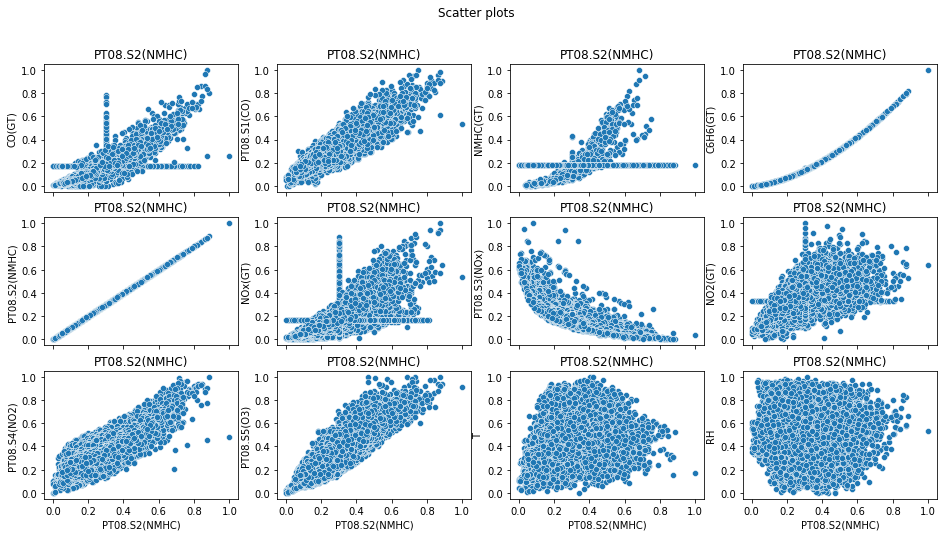

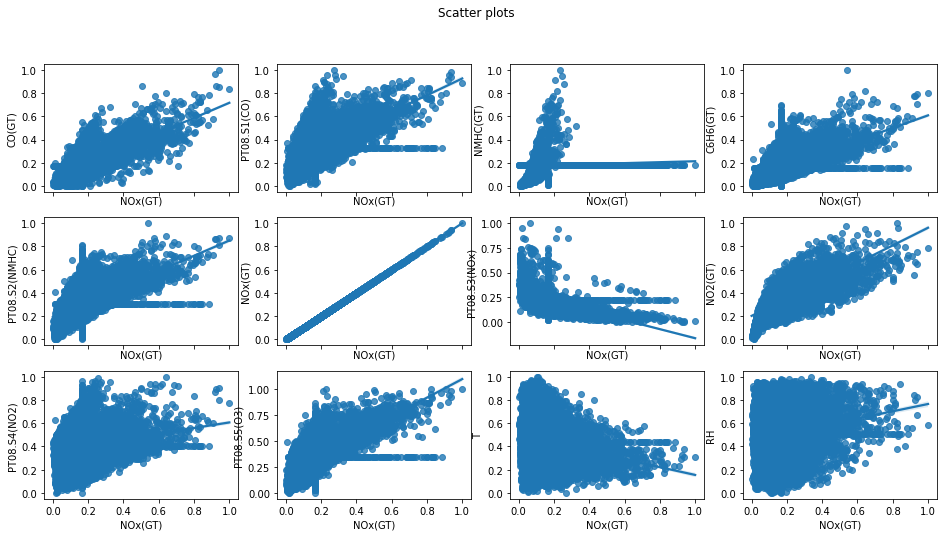

In [24]:
## MIN MAX NORMALISED
data=(data[col_list]-data[col_list].min())/(data[col_list].max()-data[col_list].min())

fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
axes = axes.flatten()
fig.suptitle('Scatter plots')
for idx,ax in enumerate(axes):
  sns.scatterplot(data=data, x="CO(GT)", y=col_list[idx],ax=ax)
#sns.displot(data, x="Date", hue="CO(GT)")
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
axes = axes.flatten()
fig.suptitle('Scatter plots and line plots')
for idx,ax in enumerate(axes):
  sns.scatterplot(data=data, x="PT08.S1(CO)", y=col_list[idx],ax=ax)


  ##############
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
axes = axes.flatten()
fig.suptitle('Scatter plots')
for idx,ax in enumerate(axes):
  sns.scatterplot(data=data, x="PT08.S1(CO)", y=col_list[idx],ax=ax)
  axes[idx].set_title('PT08.S1(CO)')
################
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
axes = axes.flatten()
fig.suptitle('Scatter plots')
for idx,ax in enumerate(axes):
  sns.scatterplot(data=data, x="NMHC(GT)", y=col_list[idx],ax=ax)
  axes[idx].set_title('NMHC(GT)')

#######################3
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
axes = axes.flatten()
fig.suptitle('Scatter plots')
for idx,ax in enumerate(axes):
  sns.scatterplot(data=data, x="C6H6(GT)", y=col_list[idx],ax=ax)
  axes[idx].set_title('C6H6(GT)')

#############################
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
axes = axes.flatten()
fig.suptitle('Scatter plots')
for idx,ax in enumerate(axes):
  sns.scatterplot(data=data, x="PT08.S2(NMHC)", y=col_list[idx],ax=ax)
  axes[idx].set_title('PT08.S2(NMHC)')

#####################
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
axes = axes.flatten()
fig.suptitle('Scatter plots')
for idx,ax in enumerate(axes):
  sns.regplot(data=data, x="NOx(GT)", y=col_list[idx],ax=ax)


In [25]:
col_list = ['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)',\
            'PT08.S4(NO2)','PT08.S5(O3)','T','RH']
data = pd.read_excel('AirQualityUCI.xlsx')
data_normalised =(data[col_list]-data[col_list].min())/(data[col_list].max()-data[col_list].min())
data_normalised['Date'] = data['Date']

for i,x in enumerate(col_list):
  print(pd.crosstab(index=data_normalised['Date'], columns=data_normalised[x]).head())

CO(GT)      0.000000  0.944313  0.944785  ...  0.991977  0.998112  1.000000
Date                                      ...                              
2004-03-10         0         0         0  ...         0         0         0
2004-03-11         1         0         0  ...         0         0         0
2004-03-12         2         0         0  ...         0         0         0
2004-03-13         1         0         0  ...         0         0         0
2004-03-14         1         0         0  ...         0         0         0

[5 rows x 97 columns]
PT08.S1(CO)  0.000000  0.378279  0.378949  ...  0.974327  0.985713  1.000000
Date                                       ...                              
2004-03-10          0         0         0  ...         0         0         0
2004-03-11          0         0         0  ...         0         0         0
2004-03-12          0         0         0  ...         0         0         0
2004-03-13          0         0         0  ...         0    

[[ 6.03063611e+03  1.06074452e+03  1.39333219e+03 -1.00829806e+02
   7.95887142e+02  1.05241961e+04 -2.24985900e+03  6.61551352e+03
  -2.67464325e+03  2.84986455e+03 -2.31337028e+02 -1.91825662e+02]
 [ 1.06074452e+03  1.08779263e+05  7.83824497e+03  1.16369832e+04
   1.05348643e+05  2.36054855e+04  9.23152673e+03  6.44949662e+03
   1.30224864e+05  1.34490853e+05  1.07554005e+04  1.25901873e+04]
 [ 1.39333219e+03  7.83824497e+03  1.95409905e+04  2.15928922e+02
   5.26837893e+03 -1.58798542e+02  2.19788402e+03  1.83371109e+03
   1.06249834e+04  6.46324135e+03 -4.57644403e-02  5.93364705e+01]
 [-1.00829806e+02  1.16369832e+04  2.15928922e+02  1.71231714e+03
   1.08702938e+04 -1.23883338e+01  6.82366938e+03 -5.76268442e+01
   1.49758986e+04  1.21255083e+04  1.73658157e+03  1.96050618e+03]
 [ 7.95887142e+02  1.05348643e+05  5.26837893e+03  1.08702938e+04
   1.17180177e+05  2.91970408e+04 -8.12838308e+03  7.67203852e+03
   1.39898190e+05  1.42320632e+05  9.89375912e+03  1.02697715e+04]
 [ 1.

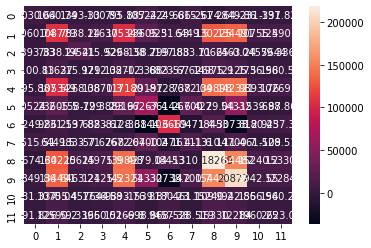

In [26]:
data2 = np.array([data[col_list[0]],data[col_list[1]],data[col_list[2]], data[col_list[3]], data[col_list[4]],\
                  data[col_list[5]], data[col_list[6]], data[col_list[7]], data[col_list[8]], data[col_list[9]],\
                  data[col_list[10]],data[col_list[11]]   ])
cov_matrix  = np.cov(data2)
print(cov_matrix)
sns.heatmap(cov_matrix, annot=True, fmt='g')
plt.show()

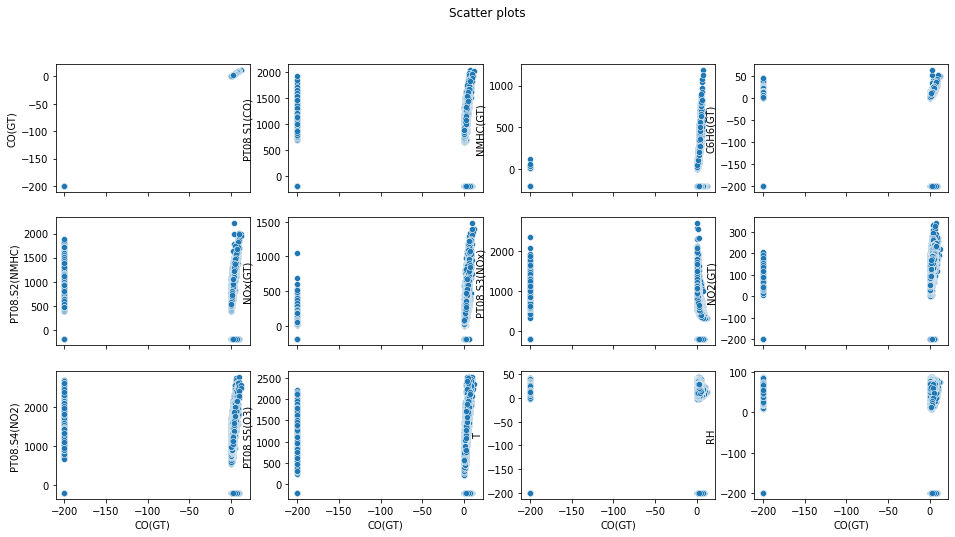

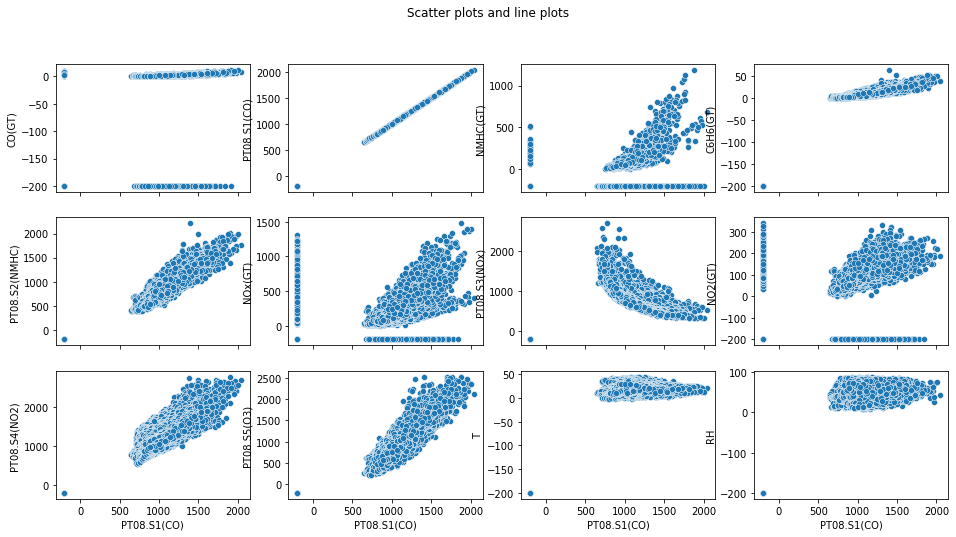

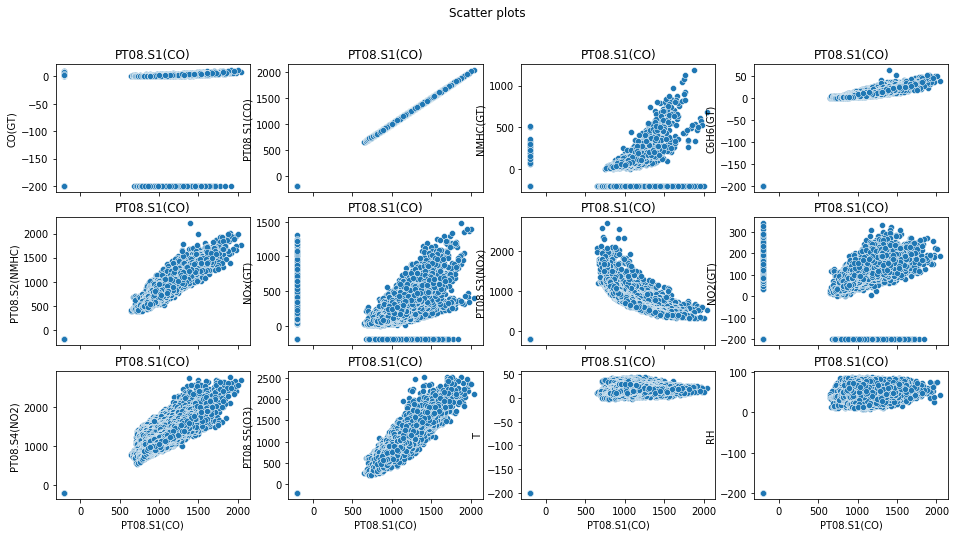

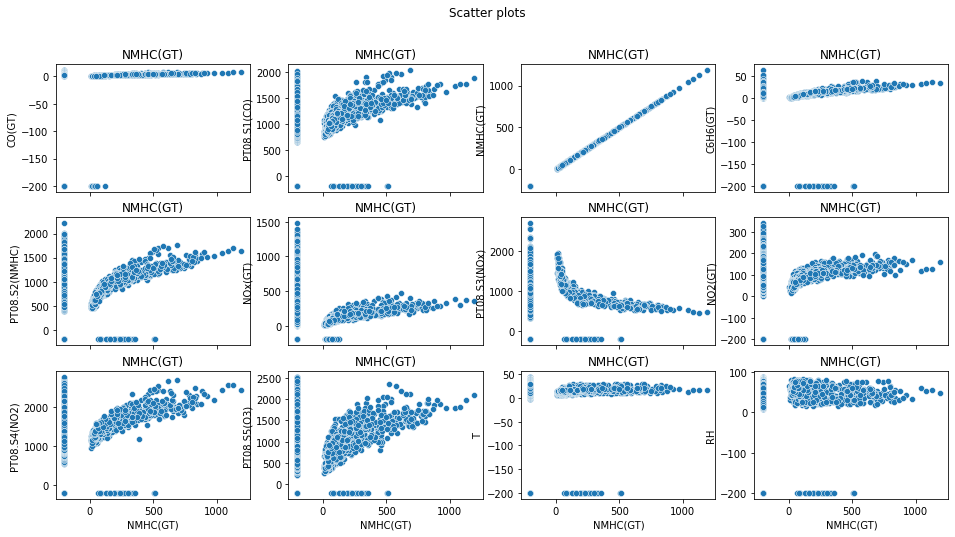

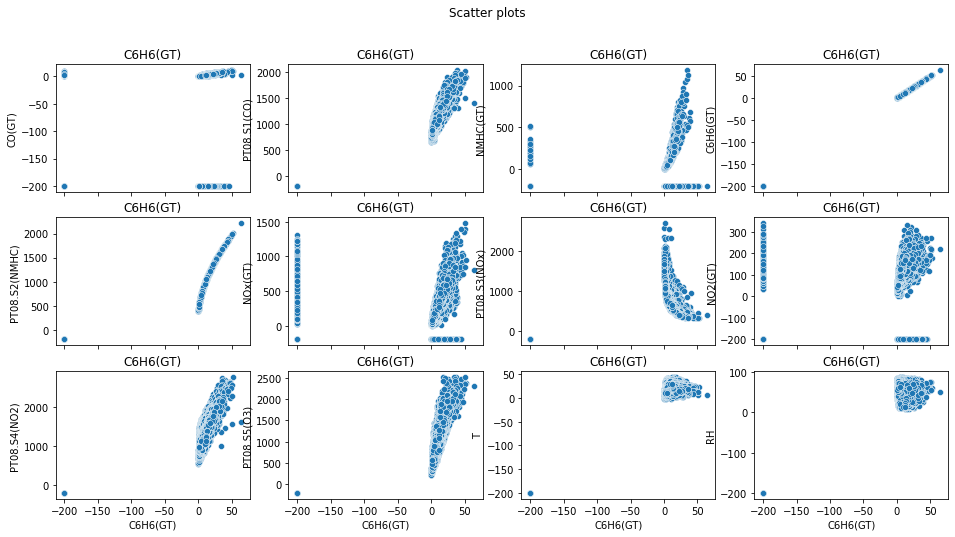

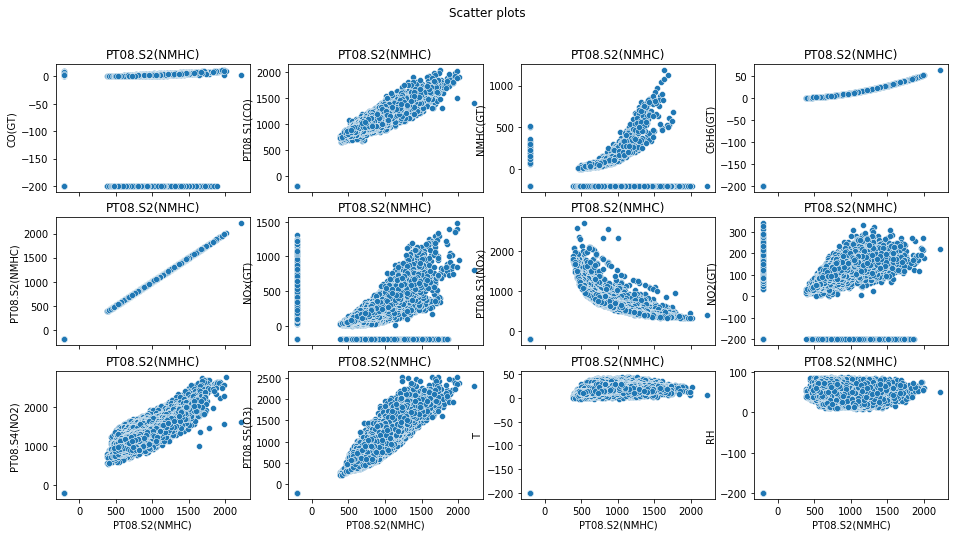

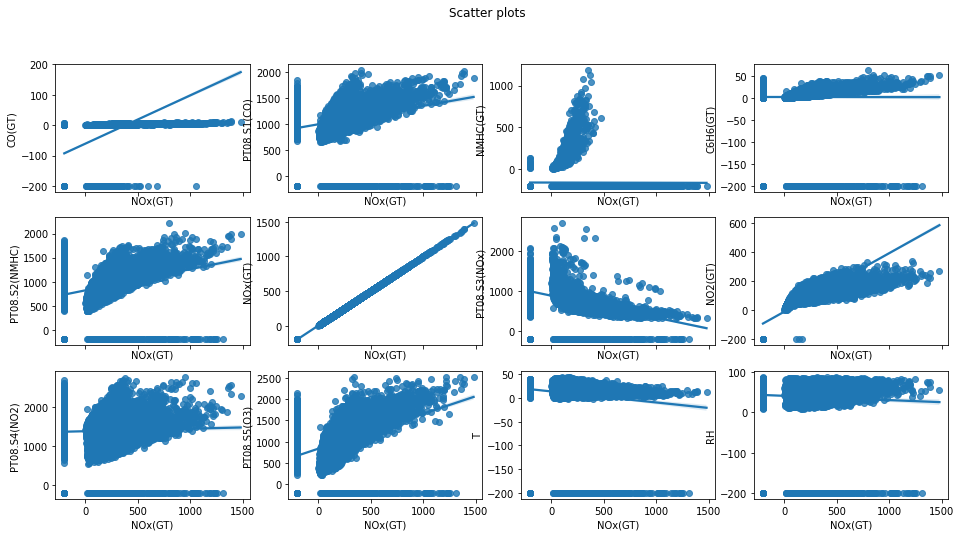

In [27]:
############### Z SCORE NORMALISED #######3
from scipy.stats import zscore
data[col_list].apply(zscore)


fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
axes = axes.flatten()
fig.suptitle('Scatter plots')
for idx,ax in enumerate(axes):
  sns.scatterplot(data=data, x="CO(GT)", y=col_list[idx],ax=ax)
#sns.displot(data, x="Date", hue="CO(GT)")
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
axes = axes.flatten()
fig.suptitle('Scatter plots and line plots')
for idx,ax in enumerate(axes):
  sns.scatterplot(data=data, x="PT08.S1(CO)", y=col_list[idx],ax=ax)


  ##############
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
axes = axes.flatten()
fig.suptitle('Scatter plots')
for idx,ax in enumerate(axes):
  sns.scatterplot(data=data, x="PT08.S1(CO)", y=col_list[idx],ax=ax)
  axes[idx].set_title('PT08.S1(CO)')
################
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
axes = axes.flatten()
fig.suptitle('Scatter plots')
for idx,ax in enumerate(axes):
  sns.scatterplot(data=data, x="NMHC(GT)", y=col_list[idx],ax=ax)
  axes[idx].set_title('NMHC(GT)')

#######################3
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
axes = axes.flatten()
fig.suptitle('Scatter plots')
for idx,ax in enumerate(axes):
  sns.scatterplot(data=data, x="C6H6(GT)", y=col_list[idx],ax=ax)
  axes[idx].set_title('C6H6(GT)')

#############################
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
axes = axes.flatten()
fig.suptitle('Scatter plots')
for idx,ax in enumerate(axes):
  sns.scatterplot(data=data, x="PT08.S2(NMHC)", y=col_list[idx],ax=ax)
  axes[idx].set_title('PT08.S2(NMHC)')

#####################
fig, axes = plt.subplots(3, 4, sharex=True, figsize=(16,8))
axes = axes.flatten()
fig.suptitle('Scatter plots')
for idx,ax in enumerate(axes):
  sns.regplot(data=data, x="NOx(GT)", y=col_list[idx],ax=ax)


In [28]:
col_list = ['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)',\
            'PT08.S4(NO2)','PT08.S5(O3)','T','RH']
data = pd.read_excel('AirQualityUCI.xlsx')
data[col_list].apply(zscore)

for i,x in enumerate(col_list):
  print(pd.crosstab(index=data_normalised['Date'], columns=data_normalised[x]).head())

CO(GT)      0.000000  0.944313  0.944785  ...  0.991977  0.998112  1.000000
Date                                      ...                              
2004-03-10         0         0         0  ...         0         0         0
2004-03-11         1         0         0  ...         0         0         0
2004-03-12         2         0         0  ...         0         0         0
2004-03-13         1         0         0  ...         0         0         0
2004-03-14         1         0         0  ...         0         0         0

[5 rows x 97 columns]
PT08.S1(CO)  0.000000  0.378279  0.378949  ...  0.974327  0.985713  1.000000
Date                                       ...                              
2004-03-10          0         0         0  ...         0         0         0
2004-03-11          0         0         0  ...         0         0         0
2004-03-12          0         0         0  ...         0         0         0
2004-03-13          0         0         0  ...         0    

[[ 6.03063611e+03  1.06074452e+03  1.39333219e+03 -1.00829806e+02
   7.95887142e+02  1.05241961e+04 -2.24985900e+03  6.61551352e+03
  -2.67464325e+03  2.84986455e+03 -2.31337028e+02 -1.91825662e+02]
 [ 1.06074452e+03  1.08779263e+05  7.83824497e+03  1.16369832e+04
   1.05348643e+05  2.36054855e+04  9.23152673e+03  6.44949662e+03
   1.30224864e+05  1.34490853e+05  1.07554005e+04  1.25901873e+04]
 [ 1.39333219e+03  7.83824497e+03  1.95409905e+04  2.15928922e+02
   5.26837893e+03 -1.58798542e+02  2.19788402e+03  1.83371109e+03
   1.06249834e+04  6.46324135e+03 -4.57644403e-02  5.93364705e+01]
 [-1.00829806e+02  1.16369832e+04  2.15928922e+02  1.71231714e+03
   1.08702938e+04 -1.23883338e+01  6.82366938e+03 -5.76268442e+01
   1.49758986e+04  1.21255083e+04  1.73658157e+03  1.96050618e+03]
 [ 7.95887142e+02  1.05348643e+05  5.26837893e+03  1.08702938e+04
   1.17180177e+05  2.91970408e+04 -8.12838308e+03  7.67203852e+03
   1.39898190e+05  1.42320632e+05  9.89375912e+03  1.02697715e+04]
 [ 1.

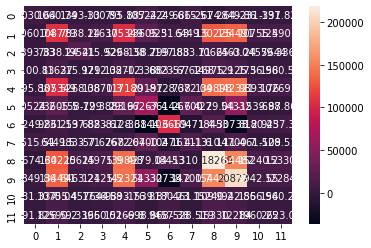

In [29]:
data2 = np.array([data[col_list[0]],data[col_list[1]],data[col_list[2]], data[col_list[3]], data[col_list[4]],\
                  data[col_list[5]], data[col_list[6]], data[col_list[7]], data[col_list[8]], data[col_list[9]],\
                  data[col_list[10]],data[col_list[11]]   ])
cov_matrix  = np.cov(data2)
print(cov_matrix)
sns.heatmap(cov_matrix, annot=True, fmt='g')
plt.show()


# 5. Final Discussion

(a) Comments on the result regarding characteristics of this dataset.

In [30]:
print('The given dataset doesnot cobtain any categorical attribute; therefore, the above mentioned analysis was not possible. However, Date was assumed as categorical')

The given dataset doesnot cobtain any categorical attribute; therefore, the above mentioned analysis was not possible. However, Date was assumed as categorical


In [31]:
#Hint: Now you must have had gained expertise enough to solve these questions by finding built-in functions.